# HOG visualizations

In [3]:
from skimage.feature import hog
%matplotlib inline

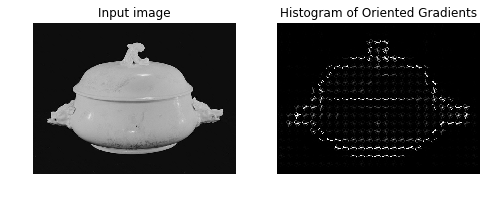

In [22]:
# find one example
import matplotlib.pyplot as plt
import cv2

from skimage.feature import hog
from skimage import data, exposure


# image = data.astronaut()
image = cv2.imread("/mnt/disks/large/debug_data/test/1018a55fce131346.png")

fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(3, 3), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

# ROC-AUC for baseline & baseline+HOG

In [20]:
train_dir = "/mnt/disks/large/data/original_train/"
data_dir = "/mnt/disks/large/data/"
output_dir = "/home/rugezhao/CS231N_CZT/data/"

In [21]:
train_df = pd.read_csv(data_dir+"train.csv", engine='python')
labels_df = pd.read_csv(data_dir+"labels.csv", engine='python')


In [8]:
# load truth
import pandas as pd
# dev
dev_ground_truth = pd.read_csv("/mnt/disks/large/data/train_split/train_split_val.csv")

# test
test_ground_truth = pd.read_csv("/mnt/disks/large/data/train_split/train_split_test.csv")

In [24]:
def convert_one_hot(train_df):
    train_id_attribute_id_ohe= np.zeros((len(train_df), len(labels_df)), dtype=int)
    for idx, attr_arr in enumerate(train_df.attribute_ids.str.split(" ").apply(lambda l: list(map(int, l))).values):
        train_id_attribute_id_ohe[idx, attr_arr] = 1
    train_id_attribute_id_ohe = pd.DataFrame(train_id_attribute_id_ohe,columns=labels_df.attribute_id)
    print(f"one hot encoding done, shape {train_id_attribute_id_ohe.shape}")
    
    return train_id_attribute_id_ohe
    

In [25]:
dev_ground_truth_ohe = convert_one_hot(dev_ground_truth)
test_ground_truth_ohe = convert_one_hot(test_ground_truth)

one hot encoding done, shape (10920, 1103)
one hot encoding done, shape (10920, 1103)


In [ ]:
baseline_dev_pred = ""
baseline_test_pred = ""

In [10]:
baseline_hog_dev_pred = pd.read_csv("/mnt/disks/large/output/baseline_hog_threshold_search_prop/test/test-36/dev_prediction.csv")
baseline_hog_test_pred = pd.read_csv("/mnt/disks/large/output/baseline_hog_threshold_search_prop/test/test-38/test_prediction.csv")

In [12]:
baseline_hog_dev_pred

,id,attribute_ids
0,1006665c0aad488.png,13 14 121 127 155 194 369 430 485 492 501 542 ...
1,1008c7837081f985.png,13 25 51 79 99 121 147 156 161 189 194 212 304...
2,1015ddcd27215ca6.png,51 79 99 121 147 156 161 188 189 194 283 369 4...
3,101e477104fc2bf7.png,13 194
4,10233e987552d468.png,13 194 813 1046 1092
5,1037596d35059b86.png,189 194 501 559 738 813 1046 1092
6,103a729425811e95.png,51 79 121 161 188 194 304 369 420 464 477 487 ...
7,103c9d42f39af074.png,13 51 79 121 147 156 182 188 189 194 212 283 3...
8,10407b0ebada4963.png,NaN
9,104737e74e765b8b.png,188 489 612 671 744 780 903


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)


In [ ]:
# TODO: 
# truth: convert to one hot (N,1103)
# pred: probability (N, 1103)

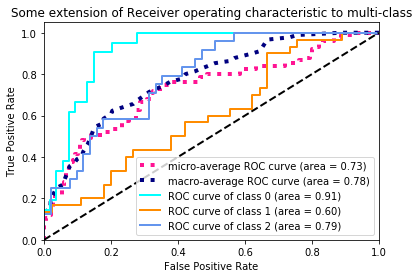

In [3]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lw = 2

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# tSNE, pick several best predicted classes

In [ ]:
import numpy as np
from sklearn import manifold, datasets
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
from colorsys import hls_to_rgb
from matplotlib import colors as mcolors
import torch


In [ ]:
def plot_tsne(embeddings, labels, perplexity=7, n_components=2):

    canvas, fig, ax = tb_plot_prep()

    tsne = manifold.TSNE(n_components=n_components, init='pca',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(embeddings)

    for d in range(NUM_DRIVERS):
        indices = [labels == d]
        if np.sum(indices)==0:
            continue
        y = Y[indices]
        ax.scatter(y[:, 0], y[:, 1], s=2,
                   c=[PLOT_COLORS[d]], label=f'Driver {d}')
    
    
    

    ax.legend(bbox_to_anchor=(1, 1), prop={'size': 5}, loc="upper left")
    plt.tight_layout(pad=7)
    # ax.scatter(Y[:,0], Y[:,1], s=2, c=colors)
    ax.set_title(f't-SNE With Perplexity $={perplexity}$')

    return tb_plot_wrap_up(canvas, fig, ax)